In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mgl_ref_df = pd.read_csv("most_bills_mgl.csv")
mgl_ref_df.drop(columns = "Unnamed: 0", inplace=True)
mgl_ref_df

,Title,BillNumber,DocketNumber,DocumentText,Reference List,MGL Ref,Combined_MGL,NumWords
0,An Act making appropriations for the Fiscal Ye...,H1,HD1,NaN,[],[],NaN,0
1,An Act relative to the recovery of overearnings,H10,HD10,\tParagraph (c) of Section 91 of chapter 32 of...,"[['32', '91']]","[""Section 91. (a) No person while receiving a ...",Section 91. (a) No person while receiving a pe...,1605
2,An Act relative to buffer zones on land under ...,H100,HD992,\tSECTION 1. Chapter 20 Section 23 of the Gene...,"[['20', '23']]","[""Section 23. (a) The secretary of environment...",Section 23. (a) The secretary of environmental...,2021
3,An Act providing living organ donor protections,H1000,HD941,\tSECTION 1. Chapter 26 of the General Laws is...,"[['26', '8L'], ['26', '8M'], ['175', '47OO'], ...","[""Section 8L. In regard to any carrier license...",Section 8L. In regard to any carrier licensed ...,11216
4,An Act relative to step therapy and in vitro f...,H1001,HD952,\tSECTION 1. Chapter 32A of the General Laws i...,"[['32A', '17R'], ['32A', '17S'], ['118E', '10N...",['[Text of section effective as applied to con...,[Text of section effective as applied to contr...,6101
...,...,...,...,...,...,...,...,...
6591,An Act to modernize the roles and responsibili...,S995,SD223,"\tSECTION 1. Section 3 of chapter 258B, as app...","[['258B', '3'], ['258B', '4'], ['258B', '6']]","[""Section 3. To provide victims a meaningful r...",Section 3. To provide victims a meaningful rol...,7274
6592,An Act to reform the hate crime statutes,S996,SD459,\tSECTION 1. Section 222 of chapter 6 of the G...,"[['6', '222'], ['30', '39'], ['22C', '33'], ['...",['Section 33. The colonel shall promulgate reg...,Section 33. The colonel shall promulgate regul...,2526
6593,An Act relative to Massachusetts state soverei...,S997,SD506,"\tSECTION 1. Chapter 12 of the General Laws, a...","[['12', '5O'], ['12', '5P'], ['12', '1357'], [...","['Section 5O. Nothing in sections 5B to 5M, in...","Section 5O. Nothing in sections 5B to 5M, incl...",33
6594,An Act to remove collateral consequences and p...,S998,SD744,"\tSECTION 1. Section 172(a)(3) of chapter 6, a...","[['', '172'], ['6', '172'], ['276', '100A'], [...","[""Section 172. (a) The department shall mainta...",Section 172. (a) The department shall maintain...,23527


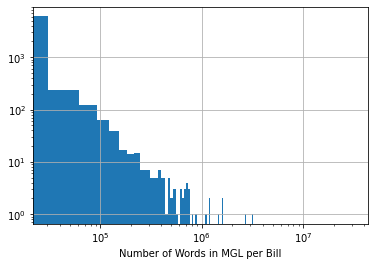

MGL with words less than 100K:  0.9672528805336568
MGL with words less than 10K:  0.8060946027895695
MGL with words less than 10K:  0.2261976955730746


In [21]:
import matplotlib.pyplot as plt
word_len = mgl_ref_df['NumWords']
# mgl_len = mgl_ref[mgl_ref["length_MGL"] != np.NaN]
# mgl_len
# empty_lists_mgl = mgl_ref_df_1[mgl_ref_df_1['combined_MGL'].str.len() == 0]

word_len.hist(bins = 1000)
# plt.xlim(xmin=0, xmax = 100000000000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Words in MGL per Bill")
plt.show()

# print(sorted(word_len, reverse = True))
# print(len(word_len<100000)/(len(word_len)))
print("MGL with words less than 100K: " , len(mgl_ref_df[mgl_ref_df['NumWords'] < 100000])/len(word_len))
print("MGL with words less than 10K: " , len(mgl_ref_df[mgl_ref_df['NumWords'] < 10000])/len(word_len))
print("MGL with words less than 10K: " , len(mgl_ref_df[mgl_ref_df['NumWords'] < 100])/len(word_len))

In [13]:
#No MGL sections extracted

print(mgl_ref_df["NumWords"].apply(lambda x: 1 if x == 0 else 0).sum())

1297


In [ ]:
#Todo

#Evaluate the correctness of extracted chapter-sections pairs for all the bills
#Find number of duplicate chapter-section pairs across the bils, if any 
#Evaluate bills with missing MGL sections based on
# 1.  Bills that don't have any text
# 2.  Bills that have text but don't have any information regarding the sections being amended
# 3.  Bills that do mention chapter-sections, but they were not extracted by the regex function
# 4.  Bills with extracted chapter-sections that returned empty strings from the API call